In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import os.path
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from PIL import Image

In [2]:
os.chdir(r'C:\Users\vasan\Desktop\Brain Tumour Project\Classification\archive')

In [3]:
X_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# VGG16

In [20]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Flatten,Dense,GlobalAveragePooling2D,Dropout

In [21]:
vgg = VGG16(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False)

In [23]:
model_vgg = vgg.output
model_vgg = GlobalAveragePooling2D()(model_vgg)
model_vgg = Dense(4,activation='softmax')(model_vgg)
model_vgg = tf.keras.models.Model(inputs=vgg.input, outputs = model_vgg)

In [24]:
model_vgg.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [27]:
history = model_vgg.fit(X_train,y_train,validation_split=0.1, epochs =25, verbose=1, batch_size=32)

Epoch 1/25
83/83 [==============================] - 37s 302ms/step - loss: 4.7971 - accuracy: 0.3068 - val_loss: 1.3765 - val_accuracy: 0.2721
Epoch 2/25
83/83 [==============================] - 19s 230ms/step - loss: 1.3587 - accuracy: 0.3042 - val_loss: 1.2990 - val_accuracy: 0.3163
Epoch 3/25
83/83 [==============================] - 19s 230ms/step - loss: 1.2372 - accuracy: 0.3723 - val_loss: 1.1460 - val_accuracy: 0.4320
Epoch 4/25
83/83 [==============================] - 19s 231ms/step - loss: 1.0890 - accuracy: 0.5339 - val_loss: 1.0319 - val_accuracy: 0.5680
Epoch 5/25
83/83 [==============================] - 19s 231ms/step - loss: 0.9719 - accuracy: 0.5823 - val_loss: 0.9863 - val_accuracy: 0.5646
Epoch 6/25
83/83 [==============================] - 20s 241ms/step - loss: 0.9081 - accuracy: 0.6186 - val_loss: 0.7964 - val_accuracy: 0.6633
Epoch 7/25
83/83 [==============================] - 19s 233ms/step - loss: 0.8305 - accuracy: 0.6561 - val_loss: 0.8263 - val_accuracy: 0.6054

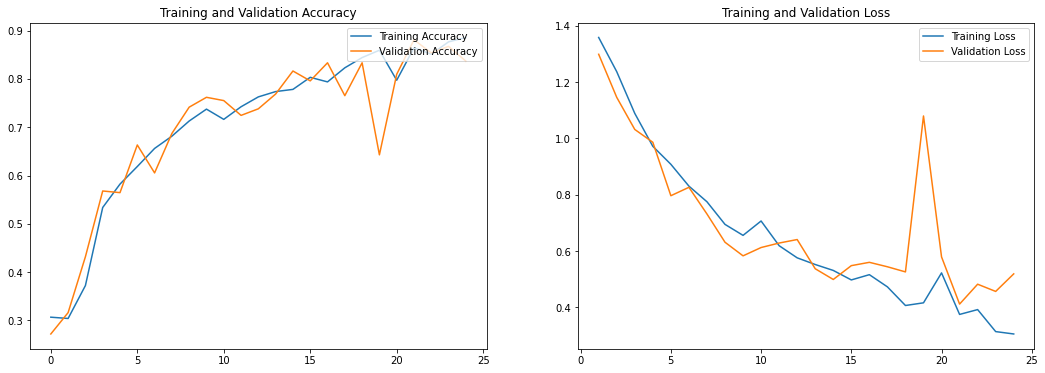

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[1:], loss[1:], label='Training Loss')
plt.plot(epochs_range[1:], val_loss[1:], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# ResNet50

In [38]:
from keras.applications.resnet import ResNet50
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [33]:
resnet = ResNet50(input_shape=(image_size,image_size,3), weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 6s 0us/step


In [36]:
model_net = resnet.output
model_net = GlobalAveragePooling2D()(model_net)
model_net = Dense(4,activation='softmax')(model_net)
model_net = tf.keras.models.Model(inputs=resnet.input, outputs = model_net)

In [39]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.2, patience = 3, min_delta = 0.001,
                              mode='auto',verbose=1)

## Without Reduce_LR

In [43]:
model_net.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
history = model_net.fit(X_train,y_train,validation_split=0.1, epochs =25, verbose=1, batch_size=32)

Epoch 1/25
83/83 [==============================] - 23s 214ms/step - loss: 0.7136 - accuracy: 0.7518 - val_loss: 141.2612 - val_accuracy: 0.3231
Epoch 2/25
83/83 [==============================] - 16s 191ms/step - loss: 0.4752 - accuracy: 0.8517 - val_loss: 2.0454 - val_accuracy: 0.5238
Epoch 3/25
83/83 [==============================] - 17s 202ms/step - loss: 0.1813 - accuracy: 0.9395 - val_loss: 0.4942 - val_accuracy: 0.8401
Epoch 4/25
83/83 [==============================] - 16s 197ms/step - loss: 0.1812 - accuracy: 0.9353 - val_loss: 0.5729 - val_accuracy: 0.9116
Epoch 5/25
83/83 [==============================] - 16s 195ms/step - loss: 0.0707 - accuracy: 0.9781 - val_loss: 0.2028 - val_accuracy: 0.9286
Epoch 6/25
83/83 [==============================] - 18s 220ms/step - loss: 0.2456 - accuracy: 0.9266 - val_loss: 4.7018 - val_accuracy: 0.3810
Epoch 7/25
83/83 [==============================] - 16s 192ms/step - loss: 0.0998 - accuracy: 0.9682 - val_loss: 1.0595 - val_accuracy: 0.64

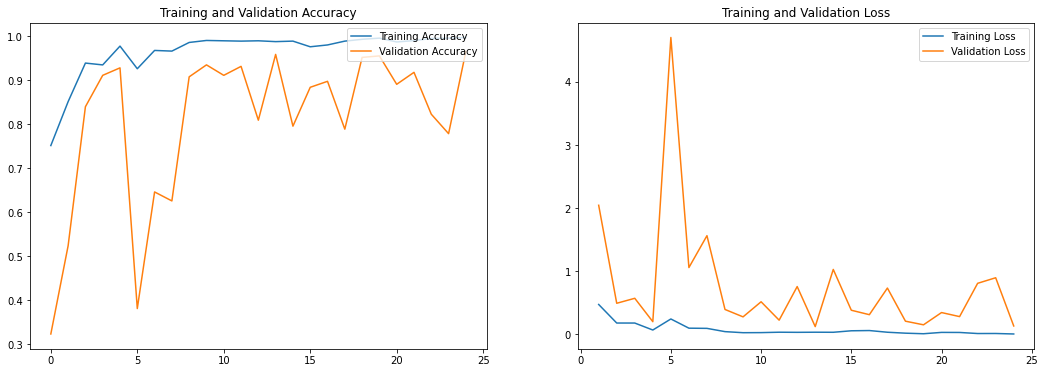

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[1:], loss[1:], label='Training Loss')
plt.plot(epochs_range[1:], val_loss[1:], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
model_net.save_weights('vanilla_resnet.h5')

## With Reduce_LR

In [47]:
model_net.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
history = model_net.fit(X_train,y_train,validation_split=0.1, epochs =25, verbose=1, batch_size=32,
                   callbacks=[reduce_lr])

Epoch 1/25
83/83 [==============================] - 20s 196ms/step - loss: 0.1047 - accuracy: 0.9667 - val_loss: 9.7068 - val_accuracy: 0.4762
Epoch 2/25
83/83 [==============================] - 16s 190ms/step - loss: 0.0648 - accuracy: 0.9796 - val_loss: 0.6367 - val_accuracy: 0.8639
Epoch 3/25
83/83 [==============================] - 16s 190ms/step - loss: 0.0575 - accuracy: 0.9811 - val_loss: 1.8040 - val_accuracy: 0.7585
Epoch 4/25
83/83 [==============================] - 16s 190ms/step - loss: 0.0735 - accuracy: 0.9762 - val_loss: 0.3246 - val_accuracy: 0.8980
Epoch 5/25
83/83 [==============================] - 16s 191ms/step - loss: 0.0405 - accuracy: 0.9879 - val_loss: 0.3594 - val_accuracy: 0.8980
Epoch 6/25
83/83 [==============================] - 16s 192ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.3699 - val_accuracy: 0.8946
Epoch 7/25
83/83 [==============================] - 17s 205ms/step - loss: 0.0067 - accuracy: 0.9970 - val_loss: 0.1399 - val_accuracy: 0.9456

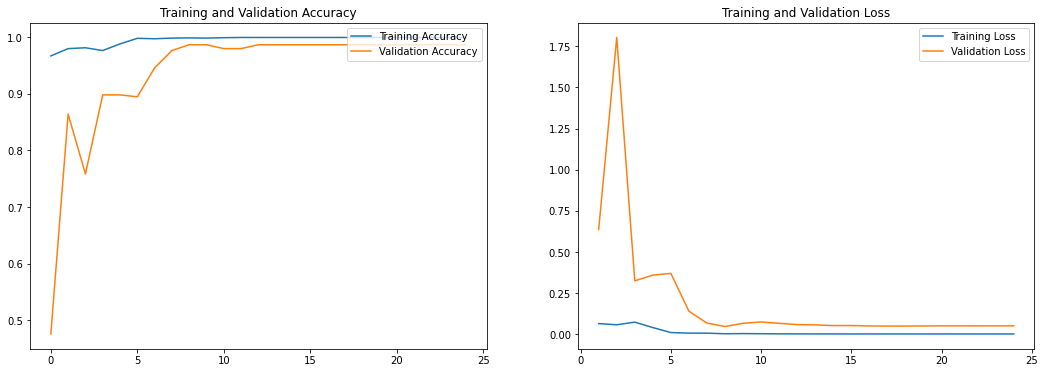

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[1:], loss[1:], label='Training Loss')
plt.plot(epochs_range[1:], val_loss[1:], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
model_net.save_weights('rlr_resnet.h5')

In [51]:
pred = model_net.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

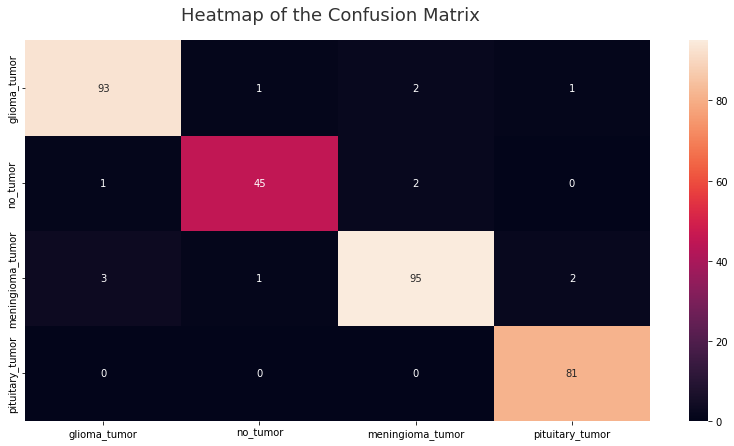

In [52]:
import seaborn as sns
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix', size=18, y=0.92,x=0.28,alpha=0.8)
plt.show()